In [1]:
import pandas as pd

fraud_data_raw = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [9]:
fraud_data_raw

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
print("Headers:", fraud_data_raw.keys())
num_fraud_examples = sum(fraud_data_raw["isFraud"])
total_examples = len(fraud_data_raw["isFraud"])
print("Fraud examples:", num_fraud_examples)
print("Total examples:", total_examples)
print("Non-fraud examples:", (total_examples - num_fraud_examples))

Headers: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
Fraud examples: 8213
Total examples: 6362620
Non-fraud examples: 6354407


In [6]:
#get types of transactions
unique_types = list(set(fraud_data_raw["type"]))

id_val = 0
unique_accounts = set(fraud_data_raw["nameOrig"])
for element in fraud_data_raw["nameDest"]:
    unique_accounts.add(element)
unique_map = {}
for element in unique_accounts:
    unique_map[element] = id_val
    id_val += 1

transaction_types_numeric = []
for idx in range(total_examples):
    item_idx = unique_types.index(fraud_data_raw["type"][idx])
    transaction_types_numeric.append(item_idx)

modified_data_dict = {}
modified_data_dict["type"] = transaction_types_numeric
modified_data_dict["amount"] = fraud_data_raw["amount"]
modified_data_dict["nameOrig"] = []
for element in fraud_data_raw["nameOrig"]:
    modified_data_dict["nameOrig"].append(unique_map[element])
modified_data_dict["oldbalanceOrg"] = fraud_data_raw["oldbalanceOrg"]
modified_data_dict["newbalanceOrig"] = fraud_data_raw["newbalanceOrig"]
modified_data_dict["nameDest"] = []
for element in fraud_data_raw["nameDest"]:
    modified_data_dict["nameDest"].append(unique_map[element])
modified_data_dict["oldbalanceDest"] = fraud_data_raw["oldbalanceDest"]
modified_data_dict["newbalanceDest"] = fraud_data_raw["newbalanceDest"]
modified_data_dict["isFraud"] = fraud_data_raw["isFraud"]

simplified_pandas = pd.DataFrame.from_dict(modified_data_dict)
#del modified_data_dict
simplified_pandas.to_csv("simplified_data.csv", index=None)
#del simplified_pandas
print('ok')

ok


In [13]:
simplified_pandas

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,4,9839.64,7938673,170136.00,160296.36,5187593,0.00,0.00,0
1,4,1864.28,3468572,21249.00,19384.72,7978165,0.00,0.00,0
2,2,181.00,7465952,181.00,0.00,4466695,0.00,0.00,1
3,3,181.00,5724844,181.00,0.00,121149,21182.00,0.00,1
4,4,11668.14,2138512,41554.00,29885.86,3434212,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
6362615,3,339682.13,372914,339682.13,0.00,7230539,0.00,339682.13,1
6362616,2,6311409.28,6689280,6311409.28,0.00,563476,0.00,0.00,1
6362617,3,6311409.28,926752,6311409.28,0.00,666314,68488.84,6379898.11,1
6362618,2,850002.52,5931068,850002.52,0.00,2260212,0.00,0.00,1


In [7]:
import numpy as np

from keras.utils import to_categorical

data = pd.read_csv("simplified_data.csv")

transaction_type_data = []
non_transaction_type_data = []
fraud_truth_value = []
for idx in range(len(data["type"])):
    element = []
    element.append(float(data["amount"][idx]))
    element.append(float(data["nameOrig"][idx]))
    element.append(float(data["oldbalanceOrg"][idx]))
    element.append(float(data["newbalanceOrig"][idx]))
    element.append(float(data["nameDest"][idx]))
    element.append(float(data["oldbalanceDest"][idx]))
    element.append(float(data["newbalanceDest"][idx]))
    non_transaction_type_data.append(element)
    transaction_type_data.append([to_categorical(data["type"][idx], len(unique_types))])
    fraud_truth_value.append([float(data["isFraud"][idx])])

non_transaction_type_data = np.array(non_transaction_type_data)
print(non_transaction_type_data.shape)
transaction_type_data = np.array(transaction_type_data)
transaction_type_data = transaction_type_data.reshape((len(data["type"]), 5))
print(transaction_type_data.shape)
fraud_truth_value = np.array(fraud_truth_value)
print(fraud_truth_value.shape)

(6362620, 7)
(6362620, 5)
(6362620, 1)


In [39]:
import random

sample_data_non_transactional = []
sample_data_transactional = []
sample_data_labels = []
num_normal_examples = 0
#for each row in data
for idx in range(len(data["amount"])):
    #if this row contains an example of fraud
    if (data["isFraud"][idx] == 1):
        element = []
        element.append(float(data["amount"][idx]))
        element.append(float(data["nameOrig"][idx]))
        element.append(float(data["oldbalanceOrg"][idx]))
        element.append(float(data["newbalanceOrig"][idx]))
        element.append(float(data["nameDest"][idx]))
        element.append(float(data["oldbalanceDest"][idx]))
        element.append(float(data["newbalanceDest"][idx]))
        sample_data_non_transactional.append(element)
        sample_data_transactional.append([to_categorical(data["type"][idx], len(unique_types))])
        sample_data_labels.append([float(data["isFraud"][idx])])
    #else if it is a randomly selected clean transaction
    elif (random.random() < (8213.0 / 6362620.0)) and (num_normal_examples < 8213):
        element = []
        element.append(float(data["amount"][idx]))
        element.append(float(data["nameOrig"][idx]))
        element.append(float(data["oldbalanceOrg"][idx]))
        element.append(float(data["newbalanceOrig"][idx]))
        element.append(float(data["nameDest"][idx]))
        element.append(float(data["oldbalanceDest"][idx]))
        element.append(float(data["newbalanceDest"][idx]))
        sample_data_non_transactional.append(element)
        sample_data_transactional.append([to_categorical(data["type"][idx], len(unique_types))])
        sample_data_labels.append([float(data["isFraud"][idx])])
        num_normal_examples += 1

print("Num Samples:", len(sample_data_labels))

#perform train-test split
sample_data_non_transactional_train = []
sample_data_non_transactional_test = []
sample_data_transactional_train = []
sample_data_transactional_test = []
sample_data_labels_train = []
sample_data_labels_test = []
for idx in range(len(sample_data_labels)): 
    if(random.random() < 0.8):
        sample_data_non_transactional_train.append(sample_data_non_transactional[idx])
        sample_data_transactional_train.append(sample_data_transactional[idx])
        sample_data_labels_train.append(sample_data_labels[idx])
    else:
        sample_data_non_transactional_test.append(sample_data_non_transactional[idx])
        sample_data_transactional_test.append(sample_data_transactional[idx])
        sample_data_labels_test.append(sample_data_labels[idx])
#convert sample data to numpy arrays
sample_data_non_transactional_train = np.array(sample_data_non_transactional_train)
sample_data_non_transactional_test = np.array(sample_data_non_transactional_test)
sample_data_transactional_train = np.array(sample_data_transactional_train)
sample_data_transactional_train = sample_data_transactional_train.reshape((len(sample_data_non_transactional_train), 5))
sample_data_transactional_test = np.array(sample_data_transactional_test)
sample_data_transactional_test = sample_data_transactional_test.reshape((len(sample_data_transactional_test), 5))
sample_data_labels_train = np.array(sample_data_labels_train)
sample_data_labels_test = np.array(sample_data_labels_test)

Num Samples: 16426


# Isolation Forest

In [1]:
# Combine the subsampled Transactional and Non-Transactional data into one array of data
comb_train = np.hstack((sample_data_non_transactional_train, sample_data_transactional_train))
comb_test = np.hstack((sample_data_non_transactional_test, sample_data_transactional_test))

NameError: name 'np' is not defined

In [112]:
from sklearn.ensemble import IsolationForest

# Isolation Forest on subsampled data
IsoFor = IsolationForest(max_samples=len(sample_data_non_transactional_train),
                    random_state=1)
IsoFor.fit(comb_train)
scores_pred = IsoFor.decision_function(comb_train)
y_pred = IsoFor.predict(comb_test)

# Reshape the prediction values to 0 for valid, 1 for fraud
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

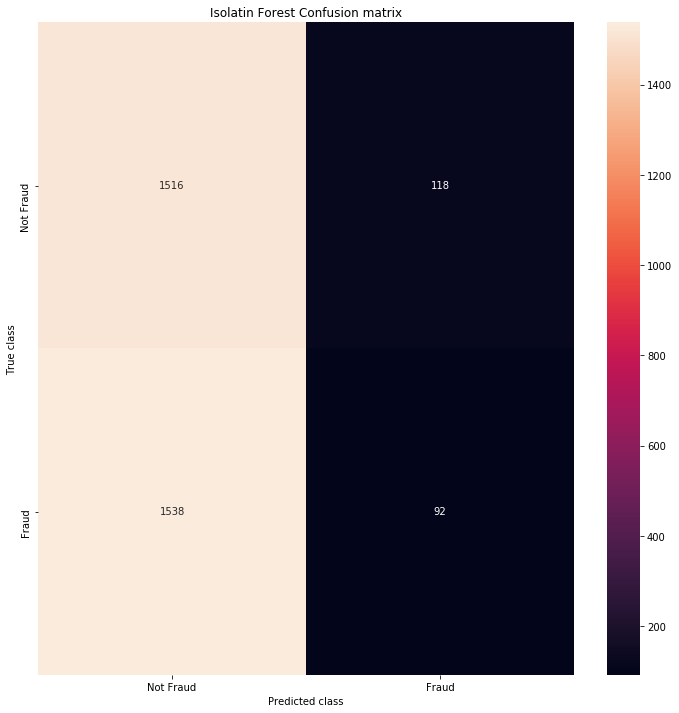

              precision    recall  f1-score   support

         0.0       0.50      0.93      0.65      1634
         1.0       0.44      0.06      0.10      1630

    accuracy                           0.49      3264
   macro avg       0.47      0.49      0.37      3264
weighted avg       0.47      0.49      0.37      3264



<Figure size 648x504 with 0 Axes>

In [116]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(sample_data_labels_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Isolatin Forest Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.figure(figsize=(9, 7))

print(classification_report(sample_data_labels_test, y_pred))

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest of subsampled data
RFor = RandomForestClassifier()
RFor.fit(comb_train,sample_data_labels_train)

y_pred = RFor.predict(comb_test)

/Users/Jerome/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


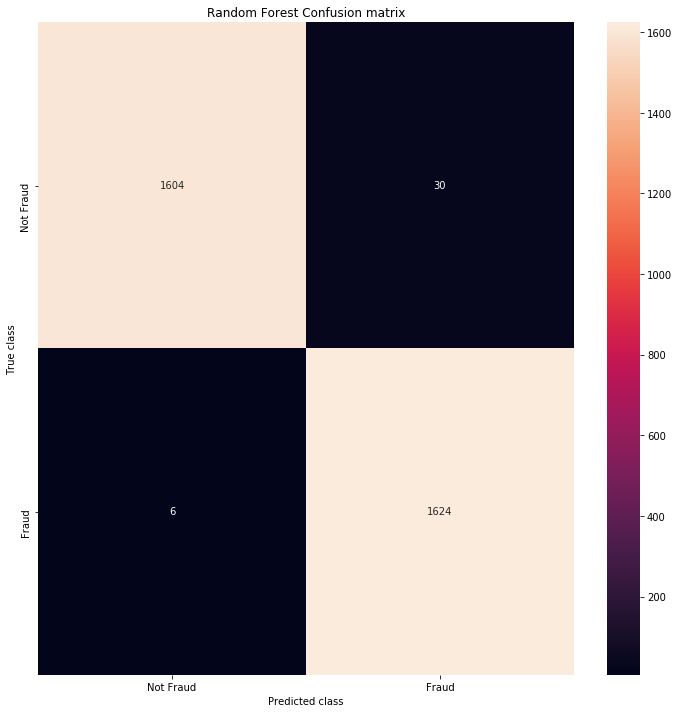

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1634
         1.0       0.98      1.00      0.99      1630

    accuracy                           0.99      3264
   macro avg       0.99      0.99      0.99      3264
weighted avg       0.99      0.99      0.99      3264



<Figure size 648x504 with 0 Axes>

In [118]:
LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(sample_data_labels_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Random Forest Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.figure(figsize=(9, 7))

print(classification_report(sample_data_labels_test, y_pred))

In [81]:
# Combine Transactional and Non-Transactional of entire dataset
comb_data = np.hstack((non_transaction_type_data, transaction_type_data))

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [83]:
from sklearn.model_selection import train_test_split

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(comb_data, fraud_truth_value, test_size=0.20)

In [84]:
# Random Forest of entire dataset
RFor = RandomForestClassifier()
RFor.fit(X_train,y_train)

y_pred = RFor.predict(X_test)

/Users/Jerome/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


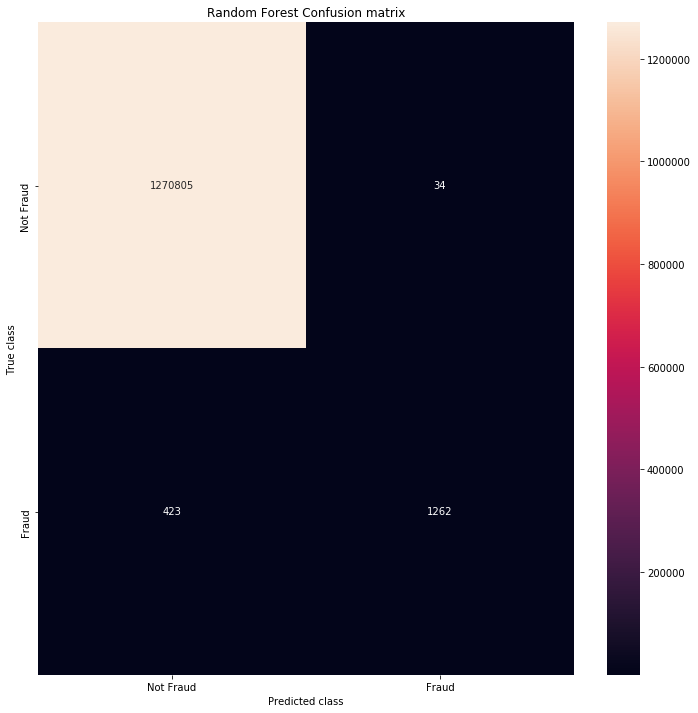

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1270839
         1.0       0.97      0.75      0.85      1685

    accuracy                           1.00   1272524
   macro avg       0.99      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



<Figure size 648x504 with 0 Axes>

In [109]:
LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Random Forest Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.figure(figsize=(9, 7))

print(classification_report(y_test, y_pred))

In [120]:
# Attempt at visualizing selected decision tree of random forest
# Ignore for now

columns = ['amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', \
          'newbalanceDest', 'payment', 'cashIn', 'debit', 'cashOut', 'transfer']
feature_list = list(columns)

estimator = RFor.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = columns,
                class_names = ['notFraud', 'fraud'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

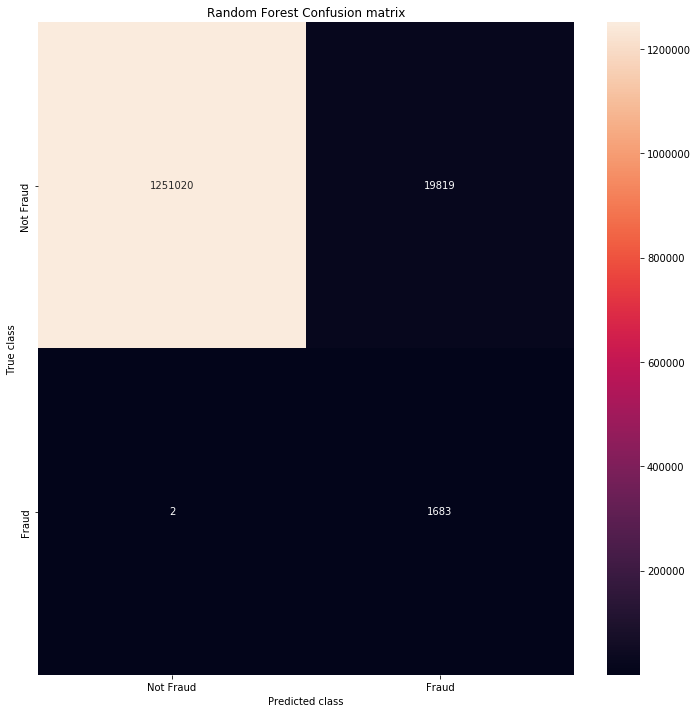

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99   1270839
         1.0       0.08      1.00      0.15      1685

    accuracy                           0.98   1272524
   macro avg       0.54      0.99      0.57   1272524
weighted avg       1.00      0.98      0.99   1272524



<Figure size 648x504 with 0 Axes>

In [119]:
# Confusion Matrix of entire dataset based on model from subsampled data

y_pred = RFor.predict(X_test)

LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Random Forest Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.figure(figsize=(9, 7))

print(classification_report(y_test, y_pred))